In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Downloading the dataset**

In [3]:
df = pd.read_csv("house_price_prediction_dataset.csv")
df.head(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [4]:
df.dtypes

Id            int64
Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    object
Garage       object
Price         int64
dtype: object

**Summary of Data**

In [7]:
# Shape and basic summary
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


**Checking for Null or Duplicate Rows**

In [ ]:
null_vals = df.isnull().sum()
duplicated_vals = df.duplicated().sum()

print(f"Number of Null Values: {null_vals}")
print(f"Number of Duplicated Values: {duplicated_vals}")

Number of Null Values: Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64
Number of Duplicated Values: 0


**Boxplots to check for outliers and skewness**

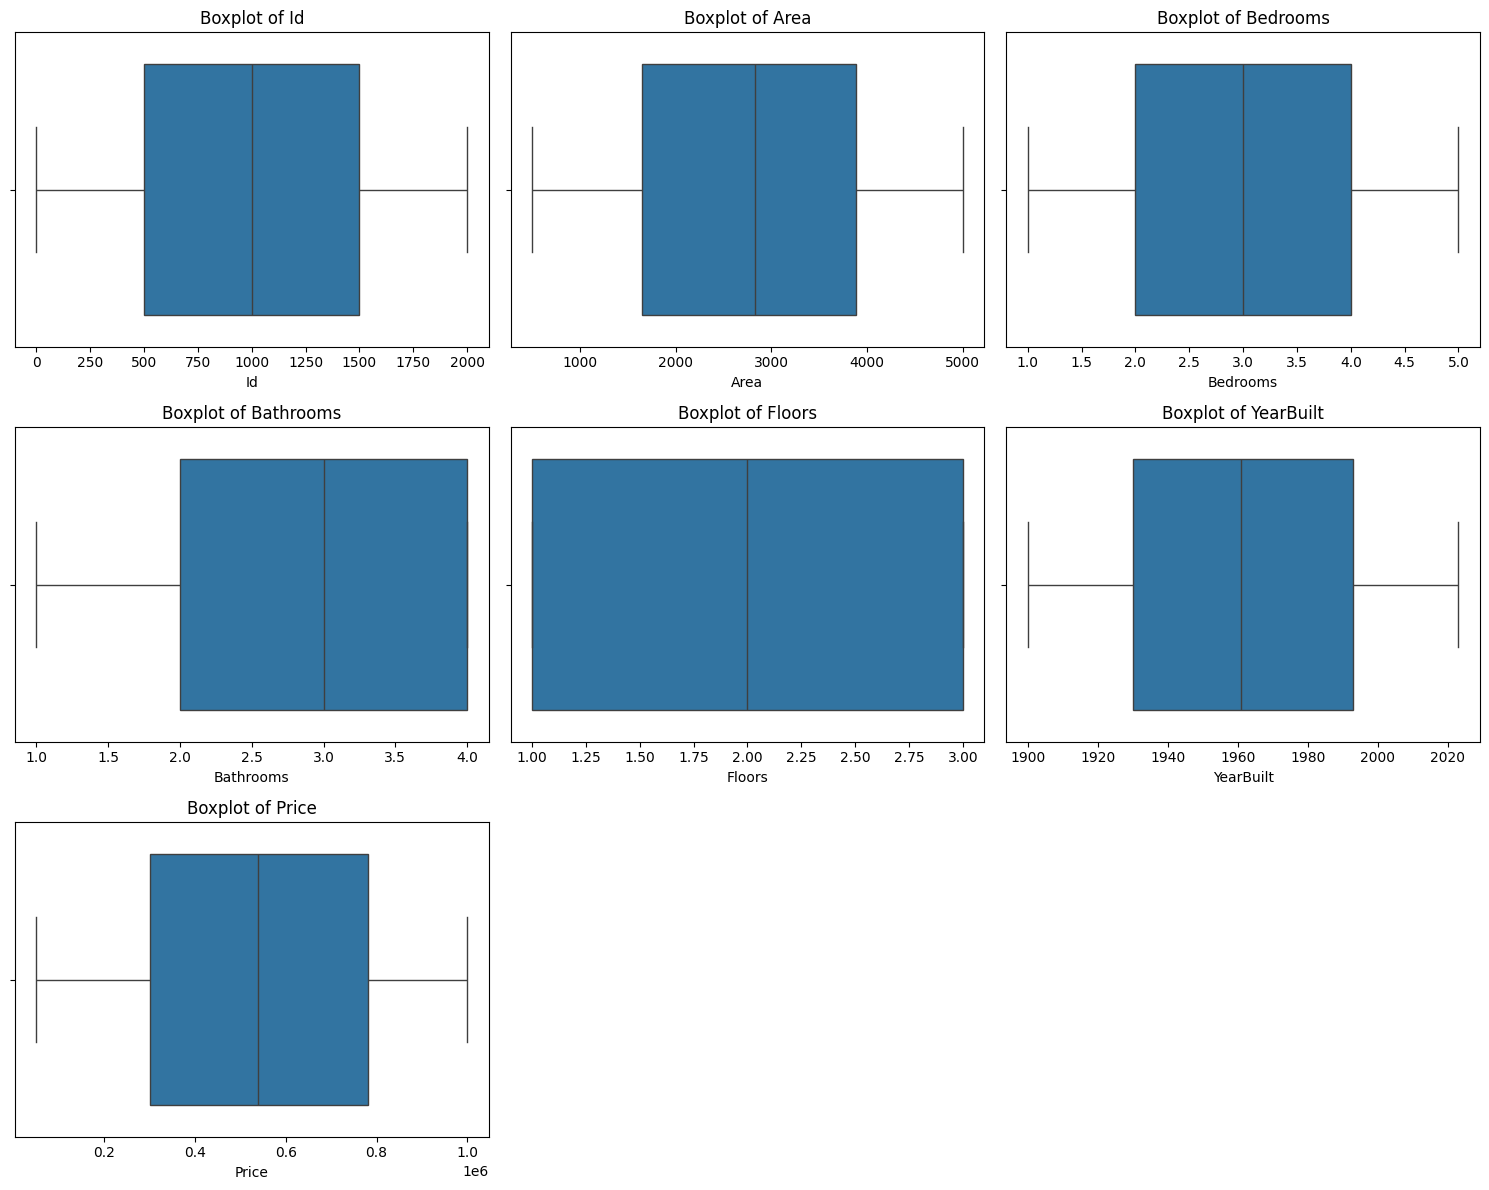

In [8]:
# 1. Automatically select columns with numerical dtypes
import math


numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# You might want to remove ID-like columns if they're not useful to plot
# Example: if 'ID' in numerical_cols: numerical_cols.remove('ID')

# 2. Define the grid layout
n_cols = 3
# Calculate the number of rows needed, rounding up
n_rows = math.ceil(len(numerical_cols) / n_cols)

# 3. Create the figure and axes grid
# We set a figure size based on 5 units wide per column and 4 units high per row
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

# Flatten the axes array to make it easy to iterate over,
# even if it's a 1D array (1 row) or 2D array (multiple rows)
axes = axes.flatten()

# 4. Loop through the numerical columns and plot
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# 5. Hide any unused subplots
# This loops from the last plotted axis (i + 1) to the end of the grid
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False) # or fig.delaxes(axes[j])

# 6. Use tight_layout to prevent titles/labels from overlapping
plt.tight_layout()
plt.show()